1. Set up a Jupyter notebook with visualization libraries, and import the cleaned data set you chose in the previous Exercise.

In [1]:
#importing dataframes
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
from pathlib import Path
from IPython.display import display, HTML

In [2]:
df = pd.read_csv(r'/Users/tiffanib./Desktop/Career Foundry Data Analytics/Achievement 6/2025-11-15 Gun Violence Analysis/02 Data/Original Data/gun-violence-data_01-2013_03-2018.csv',index_col = False)

In [3]:
path = '/Users/tiffanib./Desktop/Career Foundry Data Analytics/Achievement 6/2025-11-15 Gun Violence Analysis'

In [4]:
#checking path
path

'/Users/tiffanib./Desktop/Career Foundry Data Analytics/Achievement 6/2025-11-15 Gun Violence Analysis'

In [5]:
#importing gun violence data
Data_cleanedgv = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','Data_cleanedgv.csv'), index_col = False)

In [6]:
#checking the shape of the imported data
Data_cleanedgv.shape

(239677, 26)

In [7]:
Data_cleanedgv.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,longitude,n_guns_involved,notes,participant_age_group,participant_gender,participant_status,participant_type,sources,state_house_district,state_senate_district
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,Unknown,Unknown
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,...,-82.1377,2.0,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,...,-104.8020,NaN,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,...,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.
For instance, discard “ID,” “date,” and “index” variables. 

Questions asked in previous tasks:
1. How did the number of gun-violence incidents change each year between 2013 and 2018?
2. Which states experienced the highest and lowest number of gun-related incidents during
2013 and 2018?
3. Are gun-violence incidents more common during specific months or seasons?
4. What types of gun-violence events occur most frequently (mass shooting, domestic
disputes, armed robberies, accidental shootings, etc)?
5. How do casualty counts(injuries and fatalities) differ across states or incident types?
6. Are there particular cities or counties that emerge as persistence hotspots for gun
violence?
7. What demographic patterns can be observed among participants (age, gender, role as
victim or suspect)?
8. Is there a relationship between the number of firearms used in an incident and the
severity of causalities?
9. Do incidents involving stolen firearms result in higher casualty counts or different
incident types?
10. Are there noticeable correlations between incident locations (e.g., schools, business,
homes) and outcomes such as the number of victims or type of violence?

In [8]:
#creating variables to assist with analysis
#Create total casualties as sum of killed and injured
Data_cleanedgv['total_casualties'] = Data_cleanedgv['n_killed'] + Data_cleanedgv['n_injured']

In [9]:
#checking the dataframe to see the columns
print(Data_cleanedgv[['n_killed', 'n_injured', 'total_casualties']].head())

   n_killed  n_injured  total_casualties
0         0          4                 4
1         1          3                 4
2         1          3                 4
3         4          0                 4
4         2          2                 4


In [10]:
#creating variable if any person was killed in the incident
Data_cleanedgv['is_fatal'] = (Data_cleanedgv['n_killed'] > 0).astype(int)

#creating variable if any person was injured
Data_cleanedgv['has_injuries'] = (Data_cleanedgv['n_injured'] > 0).astype(int)

# creating variable if total casualties are 4 or more (This can be used as a high severity flag)
Data_cleanedgv['high_casualty'] = (Data_cleanedgv['total_casualties'] >= 4).astype(int)

# creating a variable if more than one victim (killed or injured)
Data_cleanedgv['multi_victim'] = (Data_cleanedgv['total_casualties'] > 1).astype(int)


In [11]:
# Check a sample of the new flag columns
print(Data_cleanedgv[['n_killed', 'n_injured', 'total_casualties',
                      'is_fatal', 'has_injuries', 'high_casualty', 'multi_victim']].head(20))

    n_killed  n_injured  total_casualties  is_fatal  has_injuries  \
0          0          4                 4         0             1   
1          1          3                 4         1             1   
2          1          3                 4         1             1   
3          4          0                 4         1             0   
4          2          2                 4         1             1   
5          4          0                 4         1             0   
6          5          0                 5         1             0   
7          0          5                 5         0             1   
8          0          4                 4         0             1   
9          1          6                 7         1             1   
10         1          3                 4         1             1   
11         1          3                 4         1             1   
12         2          3                 5         1             1   
13         0          5           

In [12]:
#checking dtype
print("n_guns_involved dtype:", Data_cleanedgv['n_guns_involved'].dtype)
print(Data_cleanedgv['n_guns_involved'].head(10))

n_guns_involved dtype: float64
0    NaN
1    NaN
2    2.0
3    NaN
4    2.0
5    NaN
6    2.0
7    NaN
8    NaN
9    NaN
Name: n_guns_involved, dtype: float64


In [13]:
#creating variables for question
def region_from_longitude(lon):
    if lon > -85:
        return "East"
    elif lon > -100:
        return "Central"
    elif lon > -125:
        return "West"
    else:
        return "Other"

Data_cleanedgv['longitude_region'] = Data_cleanedgv['longitude'].apply(region_from_longitude)


In [14]:
#checking regions
Data_cleanedgv[['longitude_region']].value_counts()

longitude_region
East                107218
Central              88021
West                 34946
Other                 9492
Name: count, dtype: int64

In [15]:
#creating variable for the latitude
def region_from_latitude(lat):
    if lat > 40:
        return "North"
    elif lat >= 35:
        return "Central"
    else:
        return "South"

Data_cleanedgv['latitude_region'] = Data_cleanedgv['latitude'].apply(region_from_latitude)


In [16]:
Data_cleanedgv[['latitude_region']].value_counts()

latitude_region
North              83258
South              79968
Central            76451
Name: count, dtype: int64

In [17]:
#creating region codes
Data_cleanedgv['long_region_code'] = Data_cleanedgv['longitude_region'].astype('category').cat.codes
Data_cleanedgv['lat_region_code'] = Data_cleanedgv['latitude_region'].astype('category').cat.codes

In [18]:
#checking columns
Data_cleanedgv[['longitude_region', 'long_region_code', 
                'latitude_region', 'lat_region_code']].sample(10)

,longitude_region,long_region_code,latitude_region,lat_region_code
210082,Central,0,South,2
131111,Central,0,Central,0
195370,East,1,North,1
44065,West,3,Central,0
154564,West,3,North,1
81446,Central,0,North,1
228761,West,3,South,2
91745,East,1,North,1
23826,East,1,Central,0
69215,Central,0,South,2


In [19]:
#selecting variables to use in the correlation matrix
variables = Data_cleanedgv[['n_killed','n_injured','total_casualties',
                            'is_fatal','has_injuries','high_casualty','multi_victim','n_guns_involved',
                            'long_region_code','lat_region_code']]

In [20]:
#creating correlation matrix with numerical relevant values only
corr_matrix = variables.corr()

In [21]:
corr_matrix.round(2)

,n_killed,n_injured,total_casualties,is_fatal,has_injuries,high_casualty,multi_victim,n_guns_involved,long_region_code,lat_region_code
n_killed,1.00,-0.13,0.51,0.90,-0.24,0.17,0.34,-0.03,0.04,0.05
n_injured,-0.13,1.00,0.79,-0.20,0.82,0.41,0.55,-0.04,-0.06,-0.02
total_casualties,0.51,0.79,1.00,0.39,0.56,0.46,0.68,-0.05,-0.03,0.02
is_fatal,0.90,-0.20,0.39,1.00,-0.27,0.08,0.23,-0.03,0.04,0.05
has_injuries,-0.24,0.82,0.56,-0.27,1.00,0.10,0.30,-0.05,-0.08,-0.03
high_casualty,0.17,0.41,0.46,0.08,0.10,1.00,0.27,-0.00,0.00,0.00
multi_victim,0.34,0.55,0.68,0.23,0.30,0.27,1.00,-0.02,-0.00,0.02
n_guns_involved,-0.03,-0.04,-0.05,-0.03,-0.05,-0.00,-0.02,1.00,0.02,0.00
long_region_code,0.04,-0.06,-0.03,0.04,-0.08,0.00,-0.00,0.02,1.00,-0.04
lat_region_code,0.05,-0.02,0.02,0.05,-0.03,0.00,0.02,0.00,-0.04,1.00


3. Create a correlation matrix heatmap (colored).
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

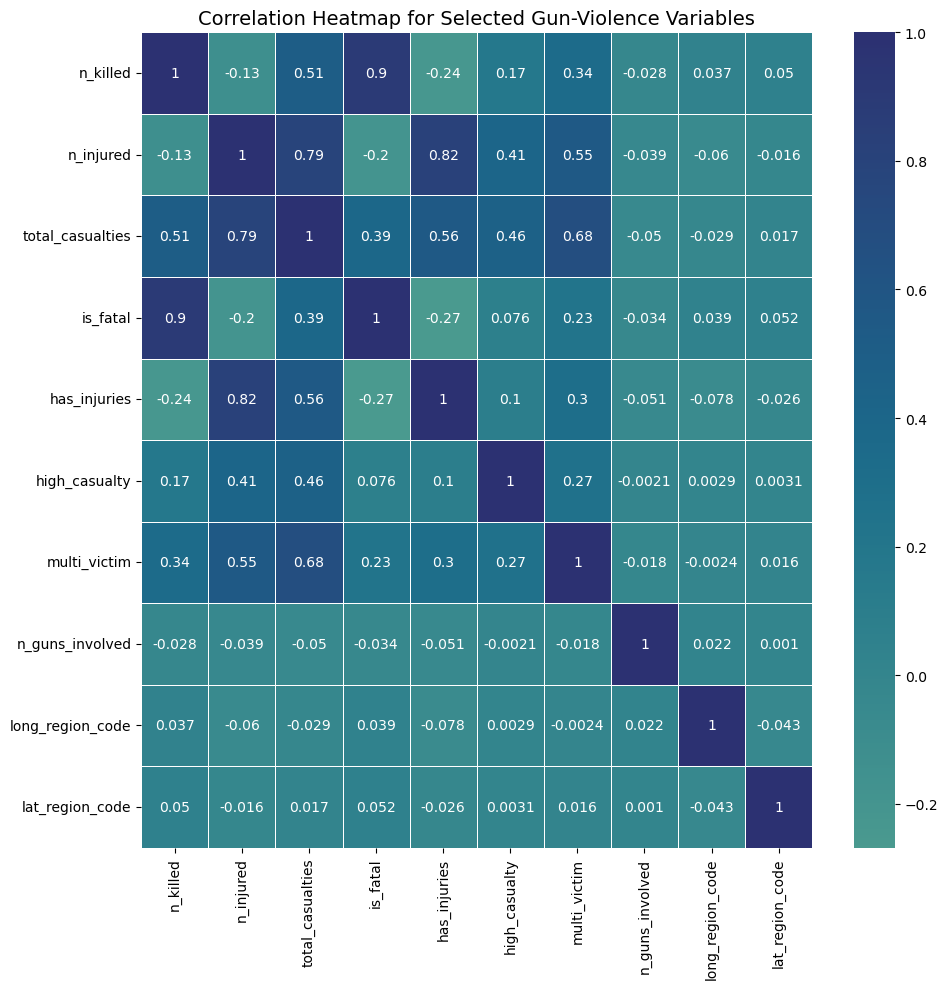

In [22]:
#creating correlation heatmap for unique colors for both positive and negative values
f,ax = pltf, ax = plt.subplots(figsize=(10, 10))

corr_heat = sns.heatmap(
    corr_matrix, 
    annot=True, 
    ax=ax, 
    cmap="crest", 
    center=0, 
    linewidths=0.5)

ax.set_title("Correlation Heatmap for Selected Gun-Violence Variables", fontsize=14)

plt.tight_layout()
plt.show()

The heatmap shows how the numerical variables in this dataset relate to one another. The strongest relationships appear among the severity measures. For example, the number of people killed has a very strong positive relationship with whether an incident was fatal and the number of people injured is strongly related to the presence of injuries. Total casualties also correlate closely with both injuries and fatalities, which makes sense because it is based on both values. These patterns confirm that the severity-related variables move together in predictable ways. On the other hand, the number of guns involved shows almost no correlation with how severe an incident is meaning that having more firearms present does not necessarily lead to higher victim counts in this dataset. Geographic region codes based on latitude and longitude show very weak correlations as well, which means location does not have a strong linear relationship with injuries or fatalities. Overall, the heatmap suggests that incident severity is driven mainly by the number of victims and the characteristics of the event itself, rather than by the number of weapons used or the geographic region.

In [23]:
#exporting heatmap
corr_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','heatmap_gunv_analysis.png'))

4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.

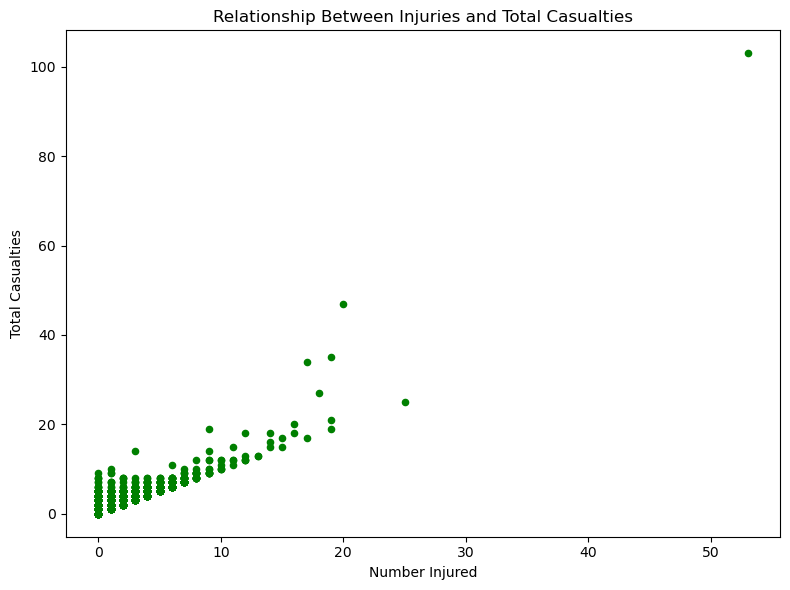

In [24]:
fig1 = plt.figure(figsize=(8,6))

plt.scatter(Data_cleanedgv['n_injured'], Data_cleanedgv['total_casualties'], s=20, color='green')
plt.xlabel('Number Injured')
plt.ylabel('Total Casualties')
plt.title('Relationship Between Injuries and Total Casualties')
plt.tight_layout()

fig1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_injuries_totalcasualties.png'))

plt.show()


This scatterplot shows a clear positive relationship between the number of people injured and the total casualties in an incident. As the number of injuries increases, total casualties rise almost proportionally, which makes sense because total casualties are calculated from both injuries and fatalities. The points form an upward trend with a few higher-severity outliers, meaning that most incidents involve lower injury counts, but large, high-impact events still exist. Overall, the pattern confirms a strong association between injuries and total casualty levels.

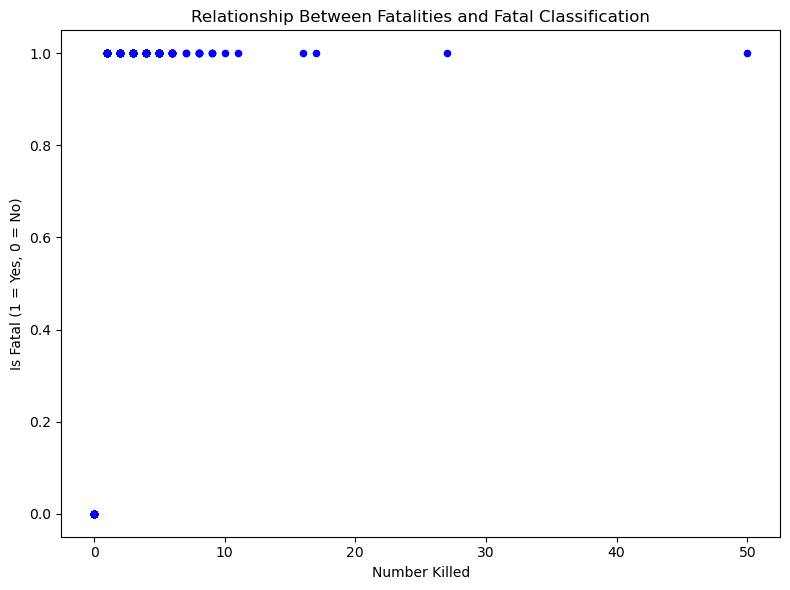

In [25]:
fig2 = plt.figure(figsize=(8,6))

plt.scatter(Data_cleanedgv['n_killed'], Data_cleanedgv['is_fatal'], s=20, color='blue')
plt.xlabel('Number Killed')
plt.ylabel('Is Fatal (1 = Yes, 0 = No)')
plt.title('Relationship Between Fatalities and Fatal Classification')
plt.tight_layout()

fig2.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_killed_isfatal.png'))

plt.show()


The relationship between fatalities and fatal classification shows an almost perfect step pattern. Nearly all incidents with at least one death are clearly marked as fatal (value of 1), while incidents with zero deaths fall at 0 on the vertical axis. This reflects a very strong positive relationship, which is expected because fatal classification is directly determined by whether deaths occurred. The tight clustering along the top of the chart highlights that even a single death immediately moves an incident into the fatal category.

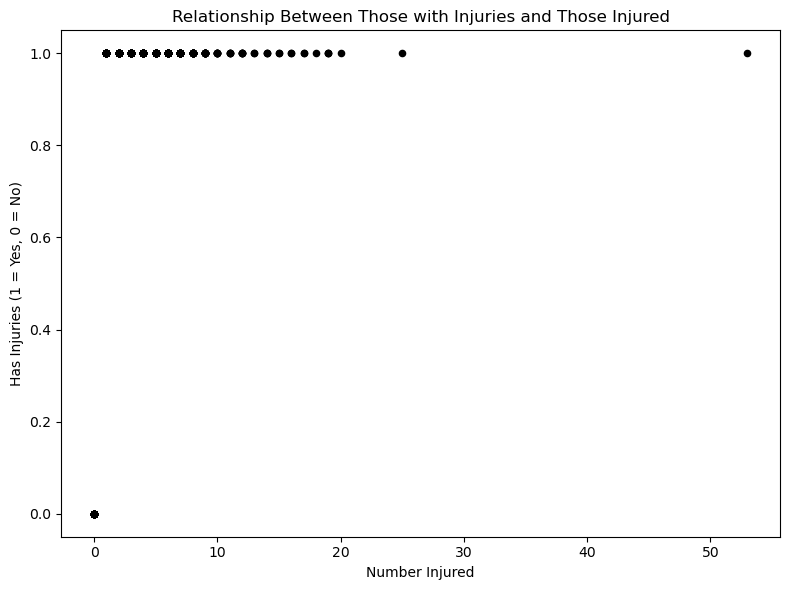

In [26]:
fig3 = plt.figure(figsize=(8,6))

plt.scatter(Data_cleanedgv['n_injured'], Data_cleanedgv['has_injuries'], s=20, color='black')
plt.xlabel('Number Injured')
plt.ylabel('Has Injuries (1 = Yes, 0 = No)')
plt.title('Relationship Between Those with Injuries and Those Injured')
plt.tight_layout()

fig3.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_injured_hasinjuries.png'))

plt.show()


This scatterplot displays a straightforward relationship: incidents with any number of injuries are classified as “has injuries,” while only incidents with zero injuries fall at the 0 level. The points form two horizontal bands, with most of the data concentrated at a value of 1 on the vertical axis. This confirms a strong and direct positive relationship, since the injury flag is triggered as soon as an injury occurs. It also shows that the vast majority of incidents involve at least one injury, consistent with the structure of the data.

In [27]:
Data_cleanedgv.columns

Index(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'address', 'n_killed', 'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude', 'longitude',
       'n_guns_involved', 'notes', 'participant_age_group',
       'participant_gender', 'participant_status', 'participant_type',
       'sources', 'state_house_district', 'state_senate_district',
       'total_casualties', 'is_fatal', 'has_injuries', 'high_casualty',
       'multi_victim', 'longitude_region', 'latitude_region',
       'long_region_code', 'lat_region_code'],
      dtype='object')

5. Create a pair plot of the entire data set.
Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

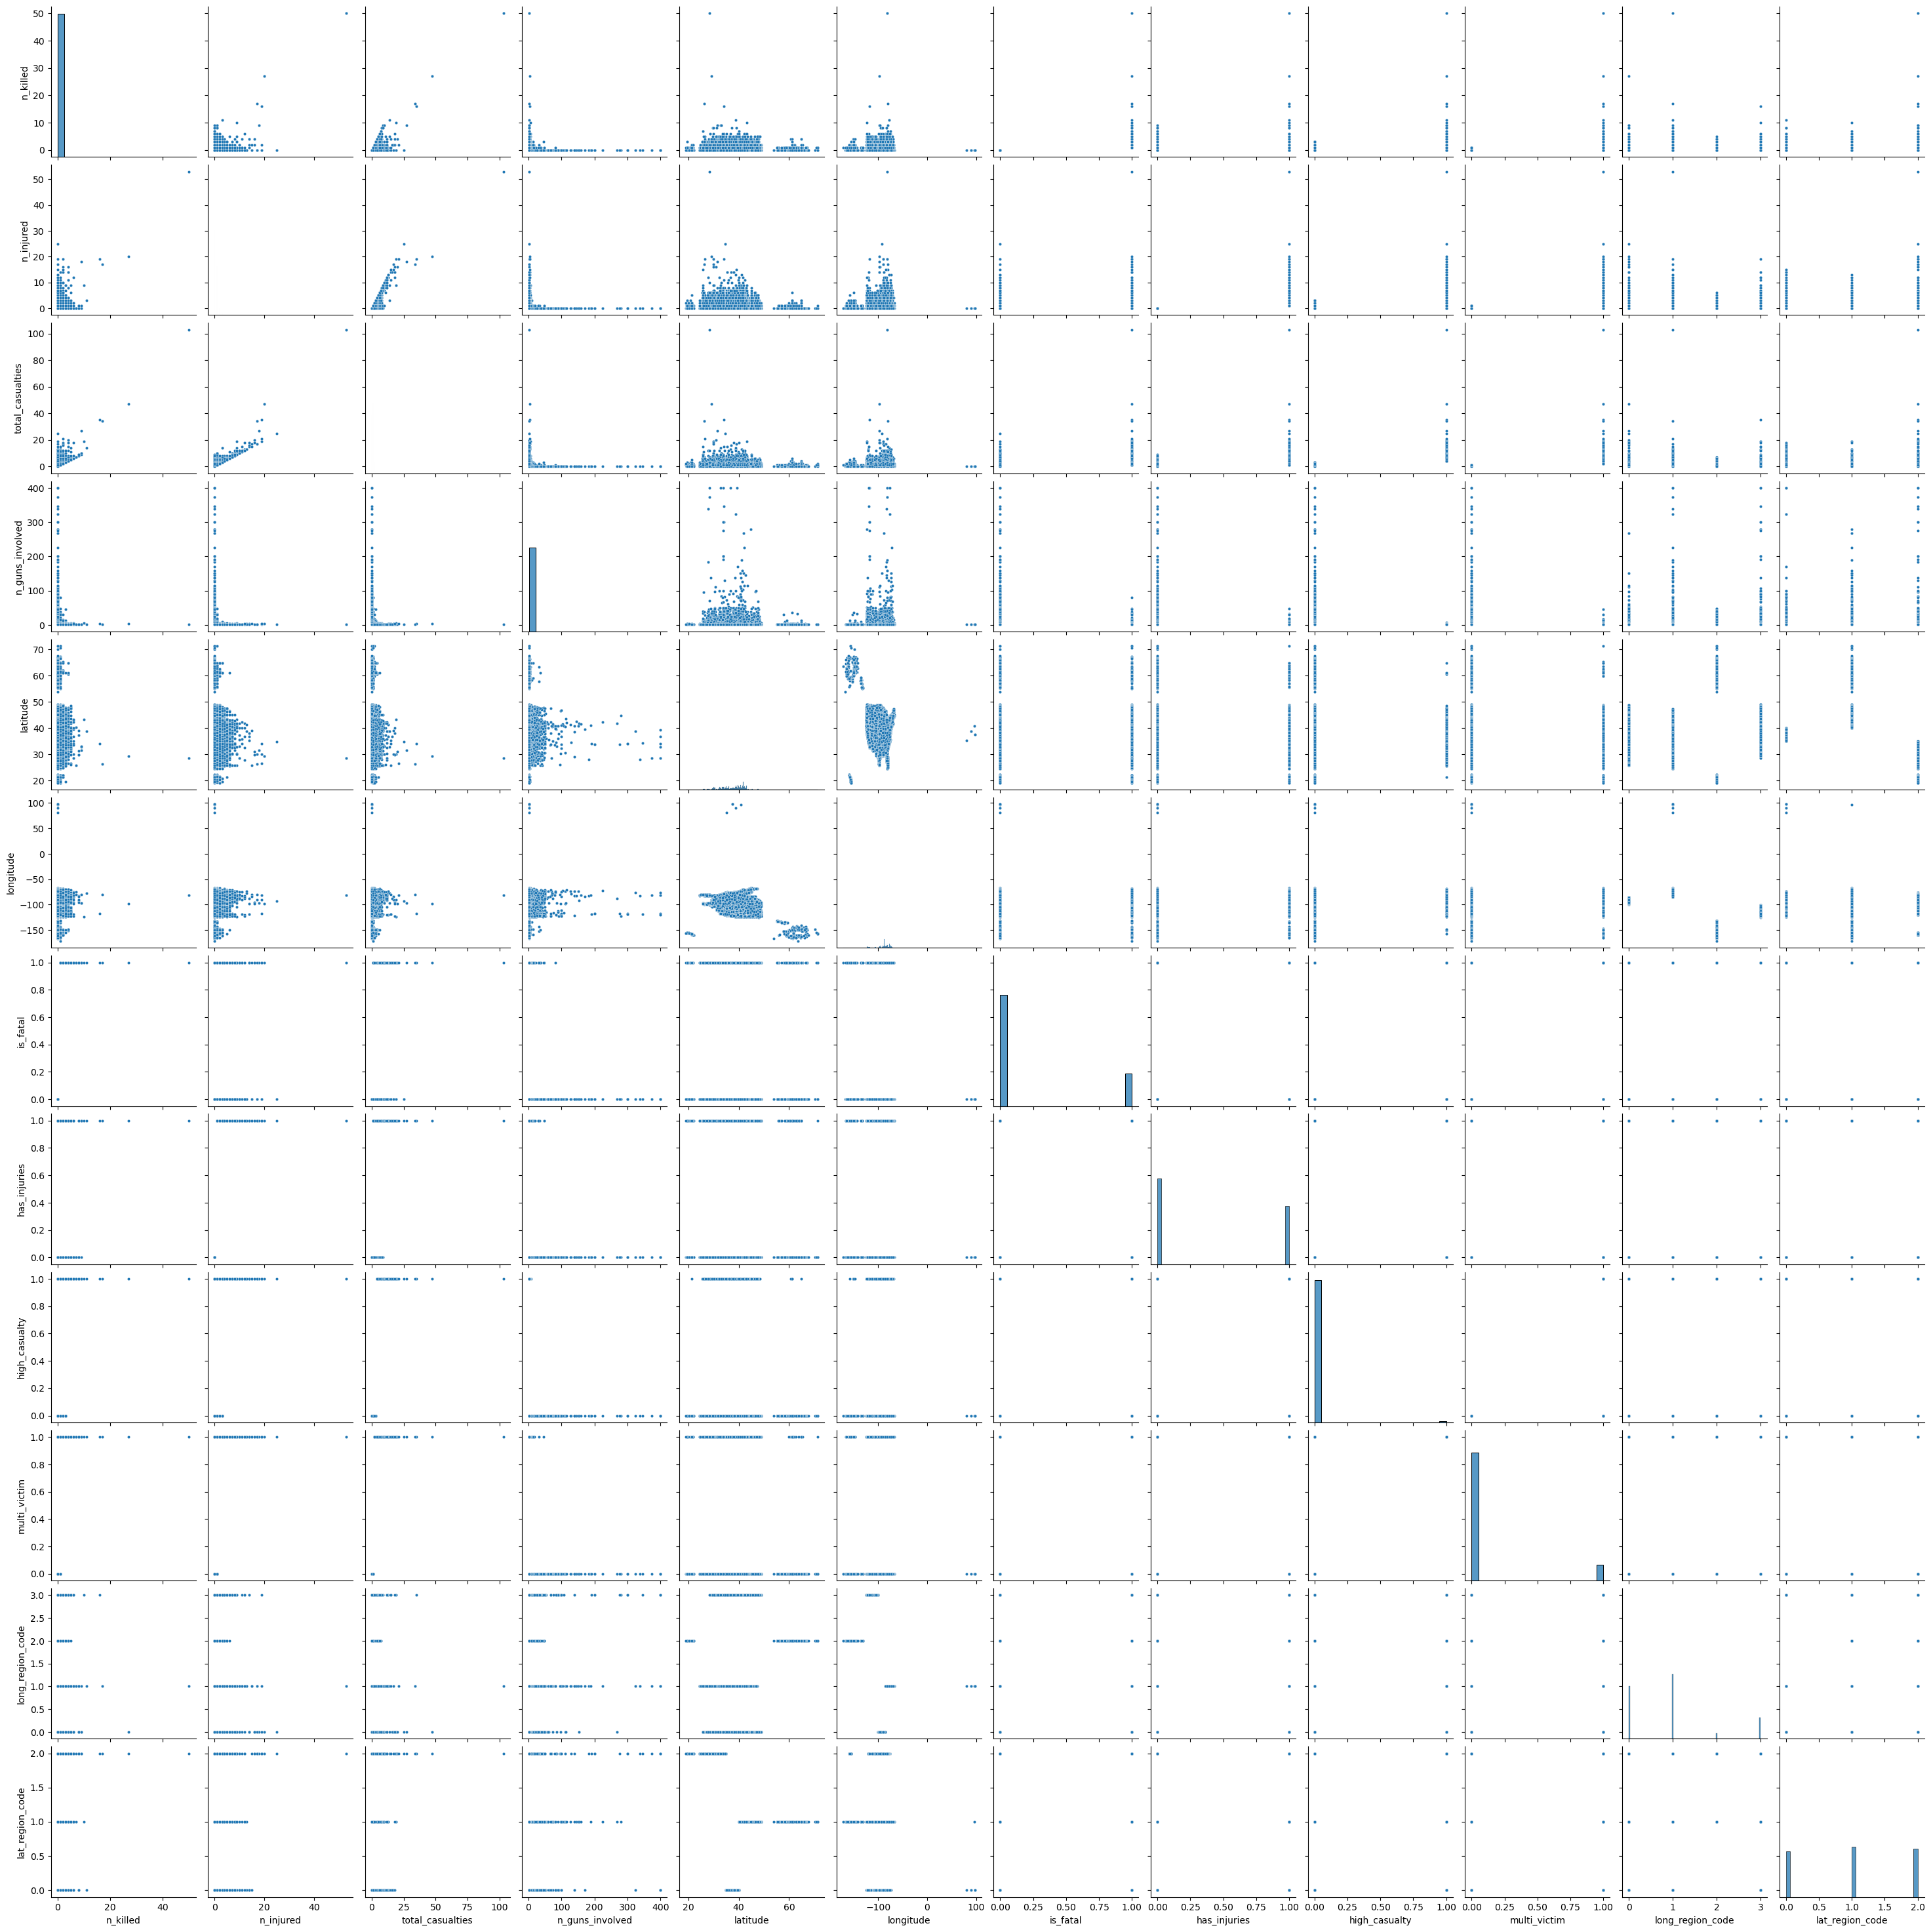

In [28]:
pairplot_vars = ['n_killed','n_injured','total_casualties','n_guns_involved','latitude','longitude',
                 'is_fatal','has_injuries','high_casualty','multi_victim','long_region_code','lat_region_code']
g = sns.pairplot(Data_cleanedgv[pairplot_vars], diag_kind='hist', plot_kws={'s':10})
g.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot_gunviolence.png'))
plt.show()

This helps reveal early patterns that connect directly to the research questions guiding this analysis. The distributions show that most incidents result in few or no casualties, while a small number of events involve significantly higher injury or fatality counts. This supports the need to explore questions about which states or cities account for the most severe incidents and how casualty levels vary by incident type. The strong visual relationship between n_injured and total_casualties suggests that injury-heavy events drive overall severity, which ties into the question of which incident types produce the highest harm and why. The geographic variables (latitude and longitude) show clear clustering, indicating that incidents are not evenly spread across the country. This connects directly to identifying persistent hotspots and understanding regional patterns in gun violence. The variables is_fatal, has_injuries, high_casualty, multi_victim also reveal separation between routine incidents and rare high-severity events, supporting deeper investigation into what factors predict severe outcomes, such as stolen guns, weapon counts, or location type. Together, these early patterns highlight which variables matter most for explaining trends, severity differences, and regional risks across the dataset.

6. Create a categorical plot and interpret the results.

/var/folders/5p/rxp_8kqn1tgbtc0fc968b0mh0000gn/T/ipykernel_87475/3121803574.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_incidents.values, y=top_incidents.index, palette='viridis')


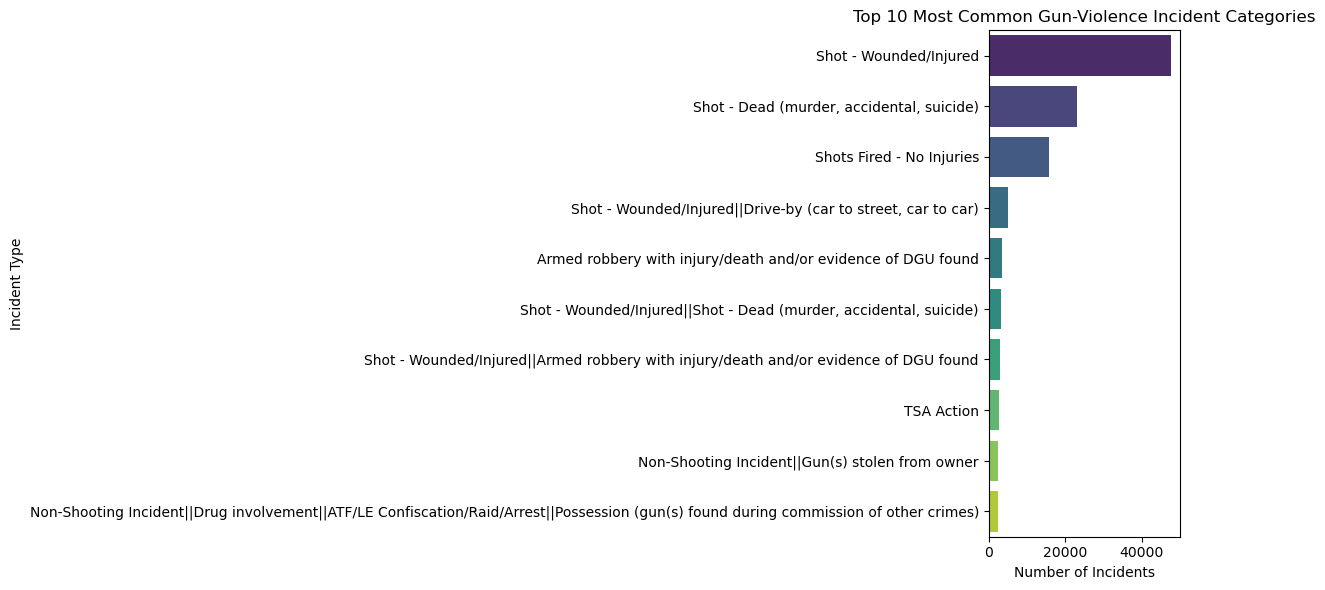

In [29]:
# Count the most common incident types
top_incidents = Data_cleanedgv['incident_characteristics'].value_counts().nlargest(10)

fig_cat = plt.figure(figsize=(12,6))
sns.barplot(x=top_incidents.values, y=top_incidents.index, palette='viridis')
plt.xlabel('Number of Incidents')
plt.ylabel('Incident Type')
plt.title('Top 10 Most Common Gun-Violence Incident Categories')
plt.tight_layout()

fig_cat.savefig(os.path.join(path,'04 Analysis','Visualizations','categorical_incident_types.png'))

plt.show()


This categorical plot shows the ten most frequently occurring types of gun-violence incidents in the dataset. The results reveal that certain categories, such as general shooting incidents and combinations involving injuries or deaths, appear far more often than specialized categories like domestic violence, workplace incidents, or robberies. The distribution is heavily skewed, with a few high-frequency categories dominating the dataset, which suggests that most gun-violence events fall into broad or overlapping classifications rather than rare, highly specific scenarios. This pattern highlights areas where further analysis may be useful, particularly incident types with high counts that may contribute disproportionately to overall injuries and fatalities. It also suggests that prevention strategies might need to be designed around these most common categories, since they represent the majority of events recorded.

7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

Existing Question - Is there a relationship between the number of firearms used and the severity of casualties?
Answer: Based on the correlations and scatterplots, the number of guns involved does not meaningfully predict how severe an incident is. This suggests that severity is more strongly driven by other factors, such as intent, setting, or type of incident.

New Questions
1. Are high casualty incidents associated with multiple shooters, stolen guns or specific locations?
2. Why do injuries contribute more strongly to total casualities than fatalies?

8. Define any hypotheses that you can at this point. You’ll be testing these later on.

* Geographic clusters indicate regional hotspots for gun violence
* Regions differ in the severity of incidents
* Stolen guns may be associated with more severe incidents

In [30]:
#exporting Dataset
corr_matrix.to_csv(os.path.join(path,'02 Data','Prepared Data','corrmatrixheatmap.csv'))